In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear regression with one variable

### Load data and plot it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None
   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
       population     profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


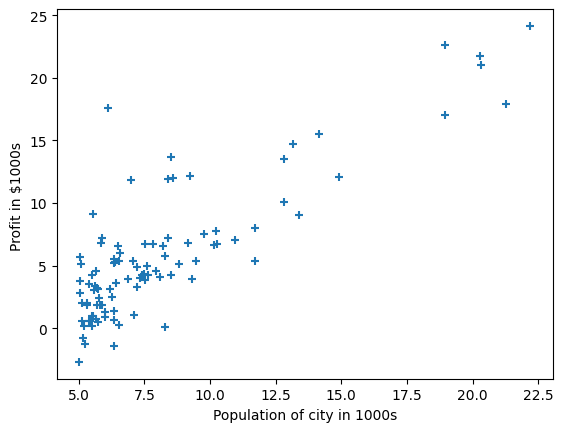

In [2]:
data1 = pd.read_csv("ex1data1.txt", header=None, names=["population", "profit"])
print(data1.info())
print(data1.head())
print(data1.describe())
plt.scatter(data1.loc[:, "population"], data1.loc[:, "profit"], marker="+")
plt.xlabel("Population of city in 1000s")
plt.ylabel("Profit in $1000s ")
# plt.plot(data1.loc[:, 0], data1.loc[:, 1])
plt.show()
plt.close()

## Data process

In [3]:
# add a column of ones to x to accommodate the \theta_0 intercept term
data1.insert(0, "ones", np.ones([len(data1), 1]))
# shape X, y, theta
X = np.array(data1.loc[:, ["ones", "population"]].values)
y = np.array(data1["profit"].values).reshape([97, 1])
theta = np.zeros([2, 1])
print(
    f"X[0]:{X[0]}, X.shape{X.shape}\n" , 
    f"y[0]: {y[0]}, y.shape{y.shape}\n",
    f"theta:{theta}, theta.shape{theta.shape}")

X[0]:[1.     6.1101], X.shape(97, 2)
 y[0]: [17.592], y.shape(97, 1)
 theta:[[0.]
 [0.]], theta.shape(2, 1)


## Define loss function
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}+{{\theta }_{1}}{{x}}$$

In [4]:
def lossFunction(X, y, theta):
    """
    :param X, y, theta: matrix
    """
    inner = np.power((X @ theta) - y, 2)
    return np.sum(inner) / (2 * len(y))

In [5]:
lossFunction(X, y, theta)

32.072733877455676

## Batch Gradient Descent
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}$$
(simultaneously update $\theta_{j}$ for all $j$)

$$\theta_{0} := \theta_{0} - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}$$

In [6]:
def BatchGredientDescent(X: np.array, y: np.array, alpha: float, theta: np.array, epoch: int):
    """
    Do batch gredient descent

    :param theta: parameters

    Return:
        parameters and all loss
    """
    temp = np.zeros(shape=theta.shape)
    loss = np.zeros(epoch)
    num_param = theta.shape[0]
    for i in range(epoch):
        error = X @ theta - y
        for j in range(num_param):
            temp = (alpha / len(X)) * (error.T @ X[:, j])
            theta[j, 0] = theta[j, 0] - temp
        loss[i] = lossFunction(X, y, theta)
    return theta, loss
    

In [7]:
alpha = 0.01
epoch = 1000
theta, loss = BatchGredientDescent(X=X, y=y, alpha=alpha, theta=theta, epoch=epoch)
print(
    f"theta: {theta}\nloss: {lossFunction(X, y, theta)}"
    )

theta: [[-3.24140214]
 [ 1.1272942 ]]
loss: 4.515955503078914


## Plot linear regression model and training set 

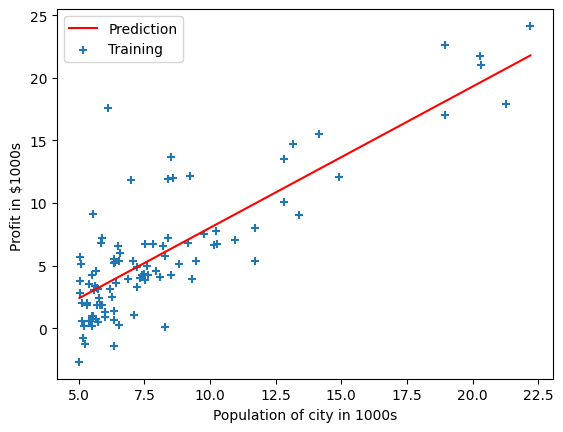

In [8]:
x = np.linspace(data1.population.min(), data1.population.max(), 100)
plt.plot(x, theta[1, 0] * x + theta[0, 0], color="r", label="Prediction")
plt.scatter(data1.population, data1.profit, marker="+", label="Training")
plt.legend()
plt.xlabel("Population of city in 1000s")
plt.ylabel("Profit in $1000s ")
plt.show()
plt.close()

## Plot loss linechart

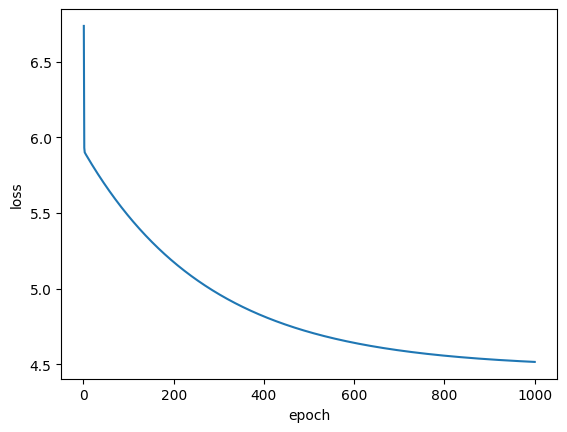

In [9]:
plt.plot(np.linspace(1, 1000, 1000), loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.close()

# Linear regression with multiple variables

In [10]:
data2 = pd.read_csv("ex1data2.txt", header=None, names=["size", "num_room", "price"])
print(data2.info())
print(data2.head())
print(data2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   size      47 non-null     int64
 1   num_room  47 non-null     int64
 2   price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB
None
   size  num_room   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
              size   num_room          price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


## Without y normalization

### data process

In [11]:
X = np.array(data2.loc[:, ["size","num_room"]])
# feature normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# save mean and std of training set for testing set
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
# add a column of ones to x to accommodate the \theta_0 intercept term
X = np.insert(X, 0, values=1, axis=1)
y = np.array(data2["price"]).reshape([len(data2), 1])
theta = np.zeros([3, 1])
print(f"X.shape: {X.shape}, y.shape: {y.shape}")
print(f"X.head: {X[: 5]}")
print(f"y.head: {y[: 5]}")
print(lossFunction(X, y, theta))

X.shape: (47, 3), y.shape: (47, 1)
X.head: [[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
y.head: [[399900]
 [329900]
 [369000]
 [232000]
 [539900]]
65591548106.45744


### Gredient descent and plot loss linechart

In [12]:
alpha = 0.001
epoch = 1000
theta, loss = BatchGredientDescent(X=X, y=y, alpha=alpha, theta=theta, epoch=epoch)
print(f"theta: {theta}\nloss: {lossFunction(X=X, y=y, theta=theta)}")

theta: [[215244.48211482]
 [ 61294.61861323]
 [ 19983.84792207]]
loss: 10672727393.58133


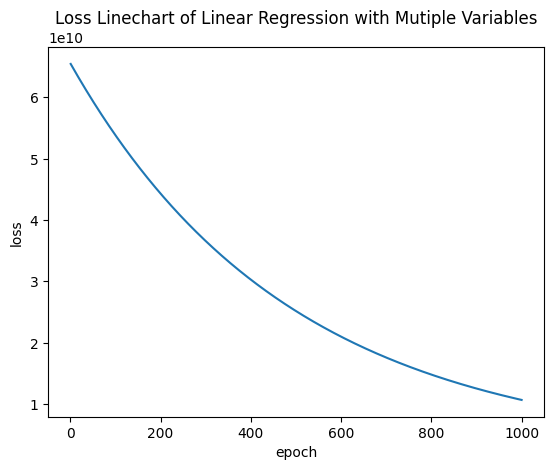

In [13]:
plt.plot(np.linspace(1, 1000, 1000), loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss Linechart of Linear Regression with Mutiple Variables")
plt.show()
plt.close()

## With y normalization
### note: when predicting, remember to do normalization for y_true or do re-normalization for y_pred

X.shape: (47, 3), y.shape: (47, 1), theta.shape: (3, 1)
X.head: [[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
y.head: [[ 0.48089023]
 [-0.08498338]
 [ 0.23109745]
 [-0.87639804]
 [ 1.61263744]]
Initial loss: 0.5
theta: [[-7.62605109e-17]
 [ 4.95500097e-01]
 [ 1.61547601e-01]]
loss:0.18553994093950169


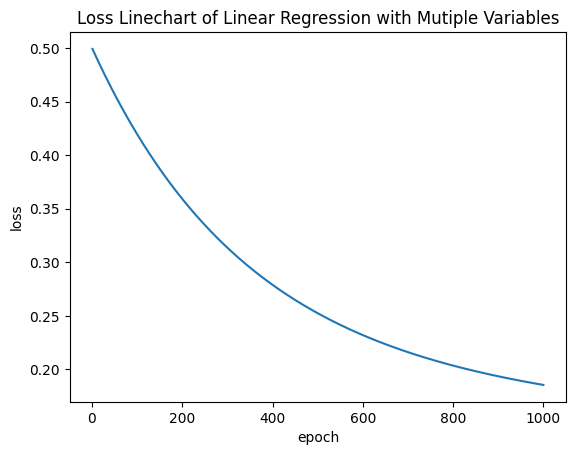

In [14]:
X = np.array(data2.loc[:, ["size", "num_room"]])
# y = np.array(data2.loc[:, "price"])
# normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
meanX = np.mean(X, axis=0)
stdX = np.std(y, axis=0)
y_norm = ((y - np.mean(y, axis=0)) / np.std(y, axis=0)).reshape(len(y), 1)
meany = np.mean(y, axis=0)
stdy = np.std(y, axis=0)
X = np.insert(X, 0, values=1, axis=1)
theta = np.zeros([3, 1])
print(f"X.shape: {X.shape}, y.shape: {y_norm.shape}, theta.shape: {theta.shape}")
print(f"X.head: {X[: 5]}")
print(f"y.head: {y_norm[: 5]}")
print(f"Initial loss: {lossFunction(X=X, y=y_norm, theta=theta)}")
# batch gredient descent
theta, loss = BatchGredientDescent(X=X, y=y_norm, alpha=0.001, theta=theta, epoch=1000)
print(f"theta: {theta}\nloss:{lossFunction(X, y_norm, theta)}")
# plot loss linechart
plt.plot(np.linspace(1, 1000, 1000), loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss Linechart of Linear Regression with Mutiple Variables")
plt.show()
plt.close()

## Test different learning rate(without y normalization)

In [15]:
alphas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
loss_alpha = np.zeros([epoch, len(alphas)])
for i in range(len(alphas)):
    theta, loss_alpha[:, i] = BatchGredientDescent(X=X, y=y, alpha=alphas[i], theta=theta, epoch=epoch)

e:\Anaconda3.5.2\envs\py37\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\le\AppData\Local\Temp\ipykernel_19904\1965281239.py:5: RuntimeWarning: overflow encountered in power
  inner = np.power((X @ theta) - y, 2)
C:\Users\le\AppData\Local\Temp\ipykernel_19904\4224673655.py:16: RuntimeWarning: overflow encountered in matmul
  temp = (alpha / len(X)) * (error.T @ X[:, j])
C:\Users\le\AppData\Local\Temp\ipykernel_19904\1965281239.py:5: RuntimeWarning: invalid value encountered in matmul
  inner = np.power((X @ theta) - y, 2)
C:\Users\le\AppData\Local\Temp\ipykernel_19904\4224673655.py:14: RuntimeWarning: invalid value encountered in matmul
  error = X @ theta - y
C:\Users\le\AppData\Local\Temp\ipykernel_19904\4224673655.py:16: RuntimeWarning: invalid value encountered in matmul
  temp = (alpha / len(X)) * (error.T @ X[:, j])


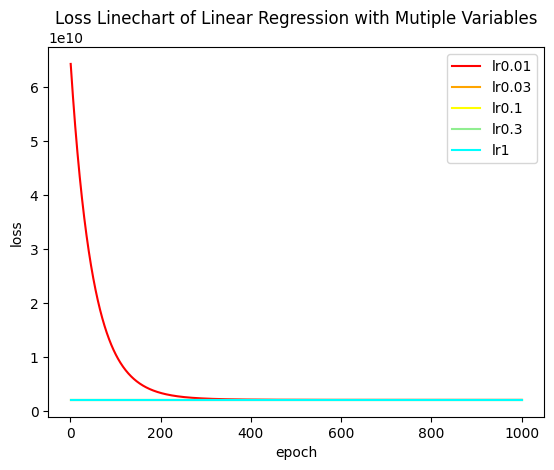

In [16]:
x_axis = np.linspace(1, 1000, 1000)
plt.plot(x_axis, loss_alpha[:, 0], color="red", label="lr0.01")
plt.plot(x_axis, loss_alpha[:, 1], color="orange", label="lr0.03")
plt.plot(x_axis, loss_alpha[:, 2], color="yellow", label="lr0.1")
plt.plot(x_axis, loss_alpha[:, 3], color="lightgreen", label="lr0.3")
plt.plot(x_axis, loss_alpha[:, 4], color="cyan", label="lr1")
# plt.plot(x_axis, loss_alpha[:, 5], color="lightblue", label="lr3")
# plt.plot(x_axis, loss_alpha[:, 6], color="purple", label="lr10")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss Linechart of Linear Regression with Mutiple Variables")
plt.legend()
plt.show()
plt.close()